In [31]:
# 학습
# Data : ALL

import tensorflow as tf
import h5py
import numpy as np
import os
from PIL import Image
import cv2
import numpy
import matplotlib.pyplot as plt

print(os.getcwd())


/home/vividlee/Desktop/YeloCar


In [4]:
# one final HDF5
# Model_deep4pc_test4_all
# 1_patience5

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

dataset_version = 'deep4pc_test4_all'

model_version = 'model_' + dataset_version + '_1_patience5'

createFolder('./Test/' + model_version)

with h5py.File('./Model/Model_' + dataset_version + '/dataset_hsv_' + dataset_version + '.hdf5', 'r') as hf:
    image_train = np.array(hf['x_train'][:, :, :, :])
    action_train = np.array(hf['y_train'][:, :])
    image_val = np.array(hf['x_val'][:, :, :, :])
    action_val = np.array(hf['y_val'][:, :])
    
    
(x_train, y_train), (x_test, y_test) = (image_train, action_train), (image_val, action_val)

x_train /= 255.
x_test /= 255.

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(48, 64, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

model.summary()

model_path = './Model/Model_' + dataset_version + '/' + model_version

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath= model_path + '_best', monitor='val_mae', verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5)

history = model.fit(x=x_train, y=y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping_callback, checkpointer])

print("\n")
print(model.evaluate(x_test, y_test))

# model.save('./script/Model/'+model_version)
#tf.saved_model.save(model, model_path)

#del model

#model = tf.keras.models.load_model('./script/Model/'+model_version)
#print(model.evaluate(x_test, y_test))
#model.summary()

#model = tf.saved_model.load('./Model/Model_' + dataset_version+ '/' + model_version)

outputs = model(x_test[0:20])

print(outputs)

f = open('./Test/' + model_version + '/' + model_version + '_test.txt', 'a')
f.write("{}".format(outputs))

x_test *= 255
    
for i in range (0, 20) :
    cv2.imwrite('./Test/' + model_version + '/'+ model_version + '_' + str(i) + '.jpeg', x_test[i])

# plotting
# trainset : blue, line
# testset : red, dot_line
y_vloss = history.history['val_loss']   # testset
y_loss = history.history['loss']        # trainset

y_vmae = history.history['val_mae']
y_mae = history.history['mae']

x_len = numpy.arrange(len(y_loss))

plt.subplot(211)
plt.plot(x_len, y_vloss, 'ro--', label='val_loss')
plt.plot(x_len, y_vloss, 'bo-', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(212)
plt.plot(x_len, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len, y_mae, 'bo-', label='mae')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(loc='upper right')
plt.grid()
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 12, 32)         9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 6, 32)        

2022-02-14 13:43:14.625259: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6699405312 exceeds 10% of free system memory.


Epoch 1/100
710/710 [==============================] - ETA: 0s - loss: 0.0081 - mae: 0.0591 - mse: 0.0081
Epoch 00001: val_mae improved from inf to 0.07486, saving model to ./Model/Model_deep4pc_test4_all/model_deep4pc_test4_all_1_patience5_best


2022-02-14 13:45:17.402387: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./Model/Model_deep4pc_test4_all/model_deep4pc_test4_all_1_patience5_best/assets
710/710 [==============================] - 120s 169ms/step - loss: 0.0081 - mae: 0.0591 - mse: 0.0081 - val_loss: 0.0119 - val_mae: 0.0749 - val_mse: 0.0119
Epoch 2/100
710/710 [==============================] - ETA: 0s - loss: 0.0061 - mae: 0.0507 - mse: 0.0061
Epoch 00002: val_mae did not improve from 0.07486
710/710 [==============================] - 121s 170ms/step - loss: 0.0061 - mae: 0.0507 - mse: 0.0061 - val_loss: 0.0133 - val_mae: 0.0794 - val_mse: 0.0133
Epoch 3/100
710/710 [==============================] - ETA: 0s - loss: 0.0057 - mae: 0.0491 - mse: 0.0057
Epoch 00003: val_mae improved from 0.07486 to 0.07440, saving model to ./Model/Model_deep4pc_test4_all/model_deep4pc_test4_all_1_patience5_best
INFO:tensorflow:Assets written to: ./Model/Model_deep4pc_test4_all/model_deep4pc_test4_all_1_patience5_best/assets
710/710 [==============================] - 121s 17

NameError: name 'numpy' is not defined

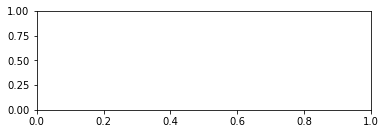

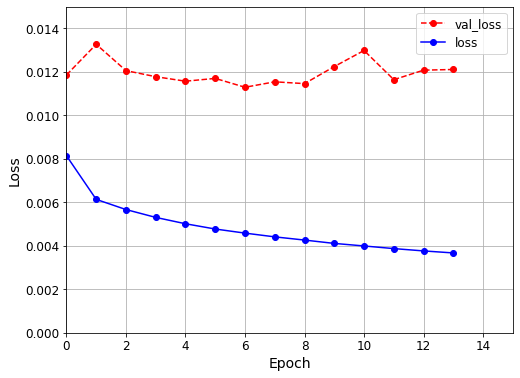

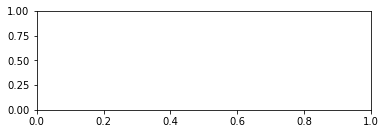

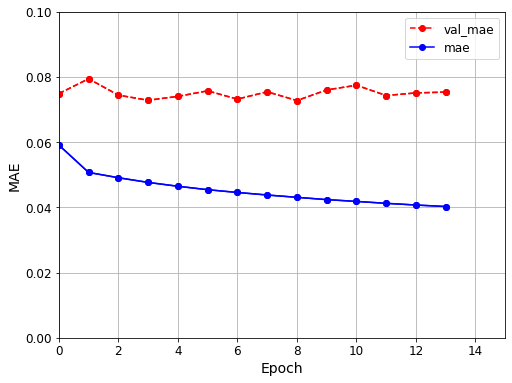

In [30]:
import numpy
import matplotlib.pyplot as plt

# plotting
# trainset : blue, line
# testset : red, dot_line

y_vloss = history.history['val_loss']   # testset
y_loss = history.history['loss']        # trainset

y_vmae = history.history['val_mae']
y_mae = history.history['mae']

x_len = numpy.arange(len(y_loss))

plt.subplot(211)
plt.figure(figsize=(8, 6))
plt.plot(x_len, y_vloss, 'ro--', label='val_loss')
plt.plot(x_len, y_loss, 'bo-', label='loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.xlim([0, 15])
plt.ylim([0, 0.015])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

plt.subplot(212)
plt.figure(figsize=(8, 6))
plt.plot(x_len, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len, y_mae, 'bo-', label='mae')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.xlim([0, 15])
plt.ylim([0, 0.10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(x_len, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len, y_mae, 'bo-', label='mae')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.grid()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 12, 32)         9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 6, 32)        

2022-02-14 18:01:43.419271: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6699405312 exceeds 10% of free system memory.


Epoch 1/100
710/710 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0599 - mse: 0.0083
Epoch 00001: val_mae improved from inf to 0.07683, saving model to ./Model/Model_deep4pc_test4_all/model_2_patience301-0.0768
INFO:tensorflow:Assets written to: ./Model/Model_deep4pc_test4_all/model_2_patience301-0.0768/assets
710/710 [==============================] - 120s 168ms/step - loss: 0.0083 - mae: 0.0599 - mse: 0.0083 - val_loss: 0.0125 - val_mae: 0.0768 - val_mse: 0.0125
Epoch 2/100
710/710 [==============================] - ETA: 0s - loss: 0.0062 - mae: 0.0513 - mse: 0.0062
Epoch 00002: val_mae improved from 0.07683 to 0.07046, saving model to ./Model/Model_deep4pc_test4_all/model_2_patience302-0.0705
INFO:tensorflow:Assets written to: ./Model/Model_deep4pc_test4_all/model_2_patience302-0.0705/assets
710/710 [==============================] - 118s 167ms/step - loss: 0.0062 - mae: 0.0513 - mse: 0.0062 - val_loss: 0.0103 - val_mae: 0.0705 - val_mse: 0.0103
Epoch 3/100
710/

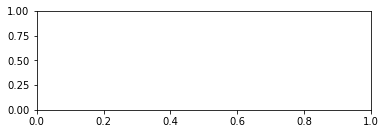

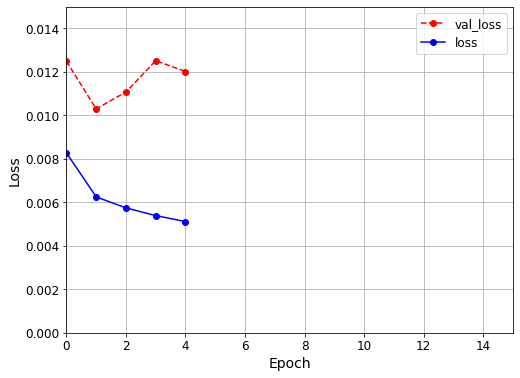

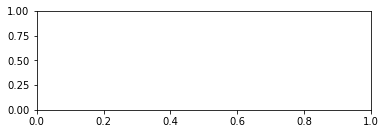

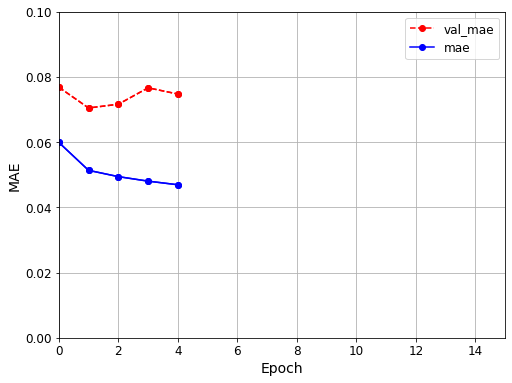

In [32]:
# one final HDF5
# Model_deep4pc_test4_all
# 1_patience5

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

dataset_version = 'deep4pc_test4_all'

model_version = 'model_' + '2_patience3'

createFolder('./Test/' + model_version)

with h5py.File('./Model/Model_' + dataset_version + '/dataset_hsv_' + dataset_version + '.hdf5', 'r') as hf:
    image_train = np.array(hf['x_train'][:, :, :, :])
    action_train = np.array(hf['y_train'][:, :])
    image_val = np.array(hf['x_val'][:, :, :, :])
    action_val = np.array(hf['y_val'][:, :])
    
    
(x_train, y_train), (x_test, y_test) = (image_train, action_train), (image_val, action_val)

x_train /= 255.
x_test /= 255.

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(48, 64, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

model.summary()

model_path = './Model/Model_' + dataset_version + '/' + model_version + '_{epoch:02d}-{val_mae:.4f}'

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath= model_path, monitor='val_mae', verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=3)

history = model.fit(x=x_train, y=y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping_callback, checkpointer])

print("\n")
print(model.evaluate(x_test, y_test))

# model.save('./script/Model/'+model_version)
#tf.saved_model.save(model, model_path)

#del model

#model = tf.keras.models.load_model('./script/Model/'+model_version)
#print(model.evaluate(x_test, y_test))
#model.summary()

#model = tf.saved_model.load('./Model/Model_' + dataset_version+ '/' + model_version)

outputs = model(x_test[0:20])

print(outputs)

f = open('./Test/' + model_version + '/' + model_version + '_test.txt', 'a')
f.write("{}".format(outputs))

x_test *= 255
    
for i in range (0, 20) :
    cv2.imwrite('./Test/' + model_version + '/'+ model_version + '_' + str(i) + '.jpeg', x_test[i])

# plotting
# trainset : blue, line
# testset : red, dot_line

y_vloss = history.history['val_loss']   # testset
y_loss = history.history['loss']        # trainset

y_vmae = history.history['val_mae']
y_mae = history.history['mae']

x_len = numpy.arange(len(y_loss))

plt.subplot(211)
plt.figure(figsize=(8, 6))
plt.plot(x_len, y_vloss, 'ro--', label='val_loss')
plt.plot(x_len, y_loss, 'bo-', label='loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.xlim([0, 15])
plt.ylim([0, 0.015])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

plt.subplot(212)
plt.figure(figsize=(8, 6))
plt.plot(x_len, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len, y_mae, 'bo-', label='mae')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.xlim([0, 15])
plt.ylim([0, 0.10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(x_len, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len, y_mae, 'bo-', label='mae')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.grid()
plt.show()

## Test Plotting

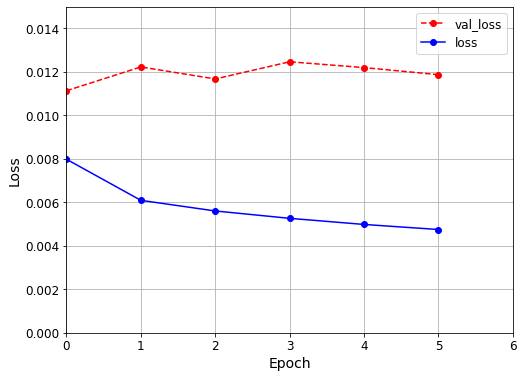

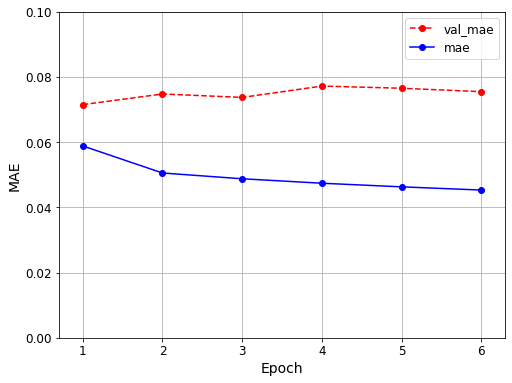

In [50]:
# plotting
# trainset : blue, line
# testset : red, dot_line

y_vloss = history.history['val_loss']   # testset
y_loss = history.history['loss']        # trainset

y_vmae = history.history['val_mae']
y_mae = history.history['mae']

x_len = numpy.arange(len(y_loss))

plt.figure(figsize=(8, 6))
plt.plot(x_len, y_vloss, 'ro--', label='val_loss')
plt.plot(x_len, y_loss, 'bo-', label='loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.xlim([0, len(y_loss)])
plt.ylim([0, 0.015])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(x_len+1, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len+1, y_mae, 'bo-', label='mae')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.xlim([0.7, len(y_loss)+0.3])
plt.ylim([0, 0.10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

## Test Plotting 2



[0.0083, 0.0062, 0.0057, 0.0054, 0.0051]


[0.0768, 0.0705, 0.0716, 0.0766, 0.0747]


[0.0599, 0.0513, 0.0494, 0.048, 0.0469]


5




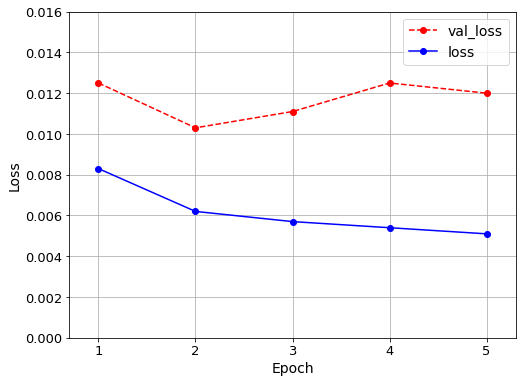

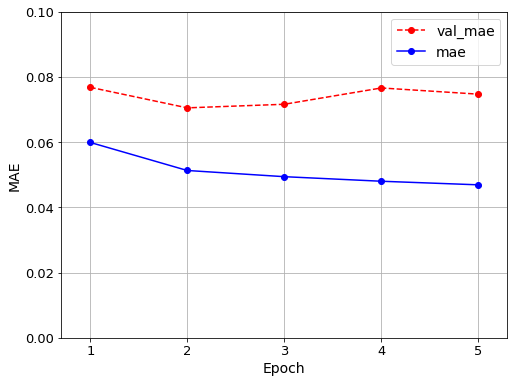

In [6]:
import numpy
import matplotlib.pyplot as plt
# Epoch 1/100
# 710/710 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0599 - mse: 0.0083
# Epoch 00001: val_mae improved from inf to 0.07683, saving model to ./Model/Model_deep4pc_test4_all/model_2_patience301-0.0768
# INFO:tensorflow:Assets written to: ./Model/Model_deep4pc_test4_all/model_2_patience301-0.0768/assets
# 710/710 [==============================] - 120s 168ms/step - loss: 0.0083 - mae: 0.0599 - mse: 0.0083 - val_loss: 0.0125 - val_mae: 0.0768 - val_mse: 0.0125

#                         Epoch 2/100
# 710/710 [==============================] - ETA: 0s - loss: 0.0062 - mae: 0.0513 - mse: 0.0062
# Epoch 00002: val_mae improved from 0.07683 to 0.07046, saving model to ./Model/Model_deep4pc_test4_all/model_2_patience302-0.0705
# INFO:tensorflow:Assets written to: ./Model/Model_deep4pc_test4_all/model_2_patience302-0.0705/assets
# 710/710 [==============================] - 118s 167ms/step - loss: 0.0062 - mae: 0.0513 - mse: 0.0062 - val_loss: 0.0103 - val_mae: 0.0705 - val_mse: 0.0103

#                         Epoch 3/100
# 710/710 [==============================] - ETA: 0s - loss: 0.0057 - mae: 0.0494 - mse: 0.0057
# Epoch 00003: val_mae did not improve from 0.07046
# 710/710 [==============================] - 118s 166ms/step - loss: 0.0057 - mae: 0.0494 - mse: 0.0057 - val_loss: 0.0111 - val_mae: 0.0716 - val_mse: 0.0111

#                         Epoch 4/100
# 710/710 [==============================] - ETA: 0s - loss: 0.0054 - mae: 0.0480 - mse: 0.0054
# Epoch 00004: val_mae did not improve from 0.07046
# 710/710 [==============================] - 120s 169ms/step - loss: 0.0054 - mae: 0.0480 - mse: 0.0054 - val_loss: 0.0125 - val_mae: 0.0766 - val_mse: 0.0125

#                         Epoch 5/100
# 710/710 [==============================] - ETA: 0s - loss: 0.0051 - mae: 0.0469 - mse: 0.0051
# Epoch 00005: val_mae did not improve from 0.07046
# 710/710 [==============================] - 121s 171ms/step - loss: 0.0051 - mae: 0.0469 - mse: 0.0051 - val_loss: 0.0120 - val_mae: 0.0747 - val_mse: 0.0120


# 1426/1426 [==============================] - 8s 6ms/step - loss: 0.0120 - mae: 0.0747 - mse: 0.0120
# [0.012015790678560734, 0.0747387707233429, 0.012015790678560734]

# plotting
# trainset : blue, line
# testset : red, dot_line

y_vloss = [0.0125, 0.0103, 0.0111, 0.0125, 0.0120]   # testset
y_loss = [0.0083, 0.0062, 0.0057, 0.0054, 0.0051]
print('\n')
print(y_loss)
print('\n')
y_vmae = [0.0768, 0.0705, 0.0716, 0.0766, 0.0747]
y_mae = [0.0599, 0.0513, 0.0494, 0.0480, 0.0469]

print(y_vmae)
print('\n')
print(y_mae)
print('\n')
x_len = numpy.arange(len(y_loss))
print(len(y_loss))
print('\n')

plt.figure(figsize=(8, 6))
plt.plot(x_len+1, y_vloss, 'ro--', label='val_loss')
plt.plot(x_len+1, y_loss, 'bo-', label='loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlim([0.7, len(y_loss)+0.3])
plt.ylim([0, 0.016])
plt.xticks([1, 2, 3, 4 ,5],fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(x_len+1, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len+1, y_mae, 'bo-', label='mae')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlim([0.7, len(y_loss)+0.3])
plt.ylim([0, 0.10])
plt.xticks([1, 2, 3, 4, 5], fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 29, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 12, 32)         9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 6, 32)        

2022-02-14 18:24:18.448262: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6699405312 exceeds 10% of free system memory.


Epoch 1/100
710/710 [==============================] - ETA: 0s - loss: 0.0078 - mae: 0.0577 - mse: 0.0078
Epoch 00001: val_mae improved from inf to 0.07130, saving model to ./Model/Model_deep4pc_test4_all/model_3_p5_01-0.0713
INFO:tensorflow:Assets written to: ./Model/Model_deep4pc_test4_all/model_3_p5_01-0.0713/assets
710/710 [==============================] - 121s 169ms/step - loss: 0.0078 - mae: 0.0577 - mse: 0.0078 - val_loss: 0.0113 - val_mae: 0.0713 - val_mse: 0.0113
Epoch 2/100
710/710 [==============================] - ETA: 0s - loss: 0.0061 - mae: 0.0507 - mse: 0.0061
Epoch 00002: val_mae did not improve from 0.07130
710/710 [==============================] - 124s 174ms/step - loss: 0.0061 - mae: 0.0507 - mse: 0.0061 - val_loss: 0.0123 - val_mae: 0.0756 - val_mse: 0.0123
Epoch 3/100
710/710 [==============================] - ETA: 0s - loss: 0.0057 - mae: 0.0490 - mse: 0.0057
Epoch 00003: val_mae did not improve from 0.07130
710/710 [==============================] - 121s 170ms

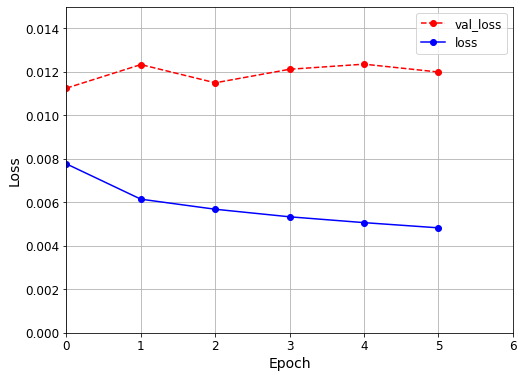

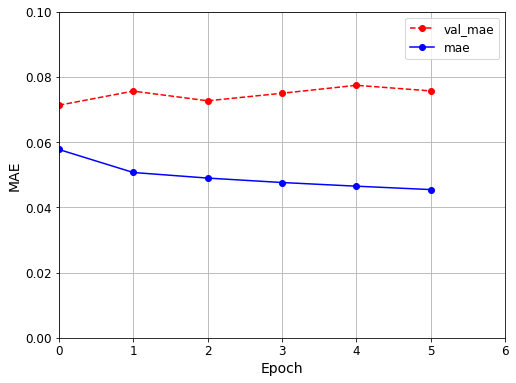

In [35]:
# one final HDF5
# Model_deep4pc_test4_all
# 3_patience5

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

dataset_version = 'deep4pc_test4_all'
model_version = 'model_' + '3_p5'

createFolder('./Test/' + model_version)

with h5py.File('./Model/Model_' + dataset_version + '/dataset_hsv_' + dataset_version + '.hdf5', 'r') as hf:
    image_train = np.array(hf['x_train'][:, :, :, :])
    action_train = np.array(hf['y_train'][:, :])
    image_val = np.array(hf['x_val'][:, :, :, :])
    action_val = np.array(hf['y_val'][:, :])
    
    
(x_train, y_train), (x_test, y_test) = (image_train, action_train), (image_val, action_val)

x_train /= 255.
x_test /= 255.

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(48, 64, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

model.summary()

model_path = './Model/Model_' + dataset_version + '/' + model_version + '_{epoch:02d}-{val_mae:.4f}'

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=model_path, monitor='val_mae', verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5)

history = model.fit(x=x_train, y=y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping_callback, checkpointer])

print("\n")
print(model.evaluate(x_test, y_test))

outputs = model(x_test[0:20])

print(outputs)

f = open('./Test/' + model_version + '/' + model_version + '_test.txt', 'a')
f.write("{}".format(outputs))

x_test *= 255
    
for i in range (0, 20) :
    cv2.imwrite('./Test/' + model_version + '/'+ model_version + '_' + str(i) + '.jpeg', x_test[i])

# plotting
# trainset : blue, line
# testset : red, dot_line

y_vloss = history.history['val_loss']   # testset
y_loss = history.history['loss']        # trainset

y_vmae = history.history['val_mae']
y_mae = history.history['mae']

x_len = numpy.arange(len(y_loss))

plt.figure(figsize=(8, 6))
plt.plot(x_len, y_vloss, 'ro--', label='val_loss')
plt.plot(x_len, y_loss, 'bo-', label='loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.xlim([0, len(y_loss)])
plt.ylim([0, 0.015])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(x_len, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len, y_mae, 'bo-', label='mae')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.xlim([0, len(y_loss)])
plt.ylim([0, 0.10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

In [56]:
# one final HDF5
# Model_deep4pc_test4_all
# 5_patience10

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

dataset_version = 'deep4pc_test4_all'
model_version = 'model_' + '5_p10'

createFolder('./Test/' + model_version)

with h5py.File('./Model/Model_' + dataset_version + '/dataset_hsv_' + dataset_version + '.hdf5', 'r') as hf:
    image_train = np.array(hf['x_train'][:, :, :, :])
    action_train = np.array(hf['y_train'][:, :])
    image_val = np.array(hf['x_val'][:, :, :, :])
    action_val = np.array(hf['y_val'][:, :])
    
    
(x_train, y_train), (x_test, y_test) = (image_train, action_train), (image_val, action_val)

x_train /= 255.
x_test /= 255.

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(48, 64, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

model.summary()

model_path = './Model/Model_' + dataset_version + '/' + model_version + '_{epoch:02d}_{loss:.4f}_{val_mae:.4f}'

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=model_path, monitor='val_mae', verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=10)

history = model.fit(x=x_train, y=y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping_callback, checkpointer])

print("\n")
print(model.evaluate(x_test, y_test))

outputs = model(x_test[0:20])

print(outputs)

f = open('./Test/' + model_version + '/' + model_version + '_test.txt', 'a')
f.write("{}".format(outputs))

x_test *= 255
    
for i in range (0, 20) :
    cv2.imwrite('./Test/' + model_version + '/'+ model_version + '_' + str(i) + '.jpeg', x_test[i])

# plotting
# trainset : blue, line
# testset : red, dot_line

y_vloss = history.history['val_loss']   # testset
y_loss = history.history['loss']        # trainset

y_vmae = history.history['val_mae']
y_mae = history.history['mae']

x_len = numpy.arange(len(y_loss))

plt.figure(figsize=(8, 6))
plt.plot(x_len+1, y_vloss, 'ro--', label='val_loss')
plt.plot(x_len+1, y_loss, 'bo-', label='loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlim([0.8, len(y_loss)+0.2])
plt.ylim([0, 0.016])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(x_len+1, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len+1, y_mae, 'bo-', label='mae')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlim([1, 3, 5, 7, 9, 11, 13, 15])
plt.ylim([0, 0.10])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 46, 62, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 21, 29, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 12, 32)         9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 6, 32)        

KeyboardInterrupt: 

[0.012222756631672382, 0.011879045516252518, 0.012576205655932426, 0.011906225234270096, 0.010974016971886158, 0.01182898972183466, 0.011380407959222794, 0.01178634911775589, 0.012169339694082737, 0.011771680787205696, 0.012297816574573517, 0.011969552375376225, 0.012214446440339088, 0.012077273800969124, 0.01341055054217577]


[0.008034314028918743, 0.006158232223242521, 0.005681909620761871, 0.0053520407527685165, 0.005094888620078564, 0.004851935431361198, 0.004677774850279093, 0.0045145670883357525, 0.004366208799183369, 0.004224706906825304, 0.004100197926163673, 0.003989202901721001, 0.003878945019096136, 0.003773127216845751, 0.0036813884507864714]


[0.07516151666641235, 0.07373484969139099, 0.0777885764837265, 0.07402989268302917, 0.07300708442926407, 0.07582435756921768, 0.07343306392431259, 0.07347580790519714, 0.07593946903944016, 0.07406559586524963, 0.0759478285908699, 0.07502728700637817, 0.0762738361954689, 0.0749654695391655, 0.07993009686470032]


[0.05858142301440239

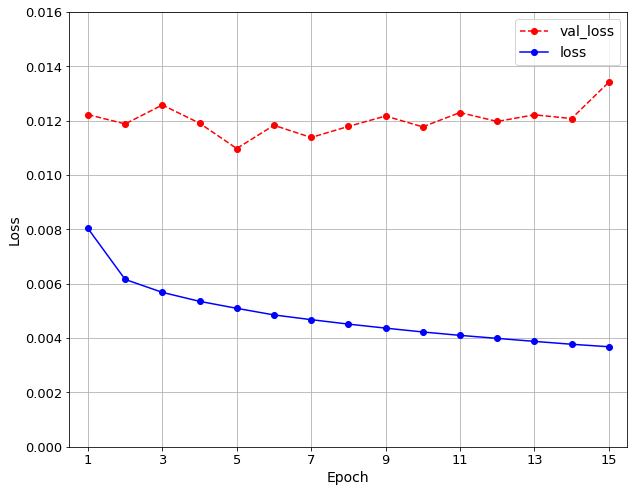

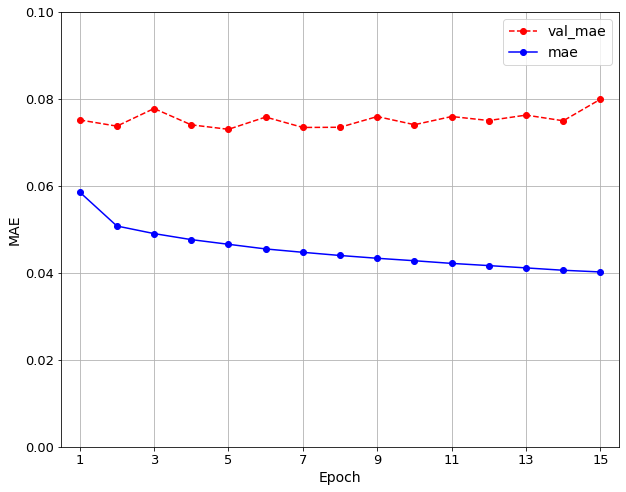

In [63]:
# plotting
# trainset : blue, line
# testset : red, dot_line

y_vloss = history.history['val_loss']   # testset
y_loss = history.history['loss']        # trainset
print(y_vloss)
print('\n')
print(y_loss)
print('\n')
y_vmae = history.history['val_mae']
y_mae = history.history['mae']
print(y_vmae)
print('\n')
print(y_mae)
print('\n')
x_len = numpy.arange(len(y_loss))
print(len(y_loss))
print('\n')

plt.figure(figsize=(10, 8))
plt.plot(x_len+1, y_vloss, 'ro--', label='val_loss')
plt.plot(x_len+1, y_loss, 'bo-', label='loss')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlim([0.5, len(y_loss)+0.5])
plt.ylim([0, 0.016])
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15],fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(x_len+1, y_vmae, 'ro--', label='val_mae')
plt.plot(x_len+1, y_mae, 'bo-', label='mae')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlim([0.5, len(y_loss)+0.5])
plt.ylim([0, 0.10])
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15], fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()